# 001. Hunt For High Volume Bars

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
import datetime as dt

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [4]:
date_start = dt.datetime(2020, 1, 1)
date_end = dt.datetime(2022, 1, 1)

In [2]:
mini = yf.download('ES=F', period='max', interval='1m', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
mini.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-05-23 15:03:00-04:00,5280.50,5281.00,5276.50,5278.25,0
2024-05-23 15:04:00-04:00,5278.00,5278.75,5276.25,5277.25,3768
2024-05-23 15:05:00-04:00,5277.25,5278.50,5276.50,5278.00,3662
2024-05-23 15:06:00-04:00,5277.75,5279.25,5274.00,5276.75,7626
2024-05-23 15:07:00-04:00,5276.75,5277.00,5274.50,5276.00,3756


In [7]:
mini.shape

(6560, 5)

In [4]:
mini.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [8]:
mini.index = pd.to_datetime(mini.index)

In [34]:
mini[mini['Volume'] == mini['Volume'].describe()['max']]

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-05-29 15:59:00-04:00,5282.25,5287.5,5281.5,5287.25,65370


In [18]:
red_bars = mini[mini['Volume'] > mini['Volume'].describe()['std']*3]

In [38]:
high_bars = pd.Series(index=mini.index, data=red_bars['Volume'])

<BarContainer object of 6560 artists>

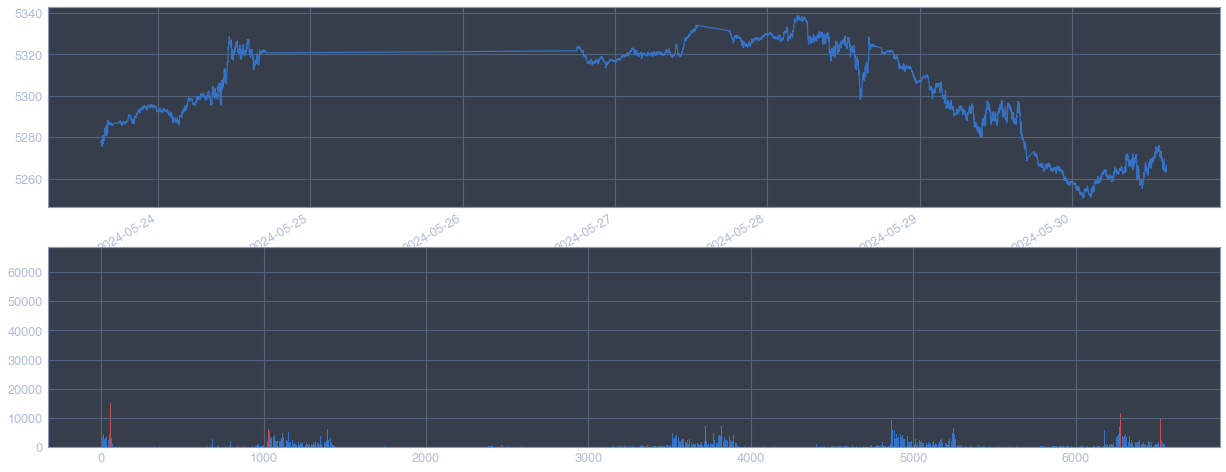

In [39]:
fig, ax = plt.subplots(2, figsize=(21, 9))
mini['Close'].plot(ax=ax[0], color='b')
ax[1].bar(np.arange(mini['Volume'].shape[0]), mini['Volume'])
ax[1].bar(np.arange(mini['Volume'].shape[0]), high_bars, color='r')